In [ ]:
#Author-Vishal Burman

In [49]:
#Importing the relevant datasets

import os, shutil
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [26]:
#Path to the directory where the original dataset was uncompressed

original_dataset_dir="original_dataset/train"

In [5]:
#Directory where we will store the smaller dataset

base_dir='cats_and_dog_small'

os.mkdir(base_dir)

In [8]:
#Directories for the training, validation and test splits

train_dir=os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir, 'valid')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
#Directory with Training cat pictures

train_cats_dir=os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#Directory with Training dog pictures

train_dogs_dir=os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Directory with Validation cats pictures

validation_cats_dir=os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#Directory with Validation dogs pictures

validation_dogs_dir=os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Directory with Test cat pictures

test_cats_dir=os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#Directory with Test dog pictures

test_dogs_dir=os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [27]:
#Copies the first 1000 cat images to train_cats_dir

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 images to validation_cats_dir

fnames=['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 images to test_cats_dir

fnames=['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
#Copies the first 1000 images to train_dogs_dir

fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 images to validation_dogs_dir

fnames=['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 images to the test_dogs_dir

fnames=['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
"""

Instantiating a small ConvNet for DogsVsCats classification

"""

In [37]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
#Dimensions of the feature maps

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [42]:
#Configuring the model for training

model.compile(loss='binary_crossentropy', optimizer=optimizers.adam(), metrics=['accuracy'])

In [46]:
#Using ImageDataGenerator to read images from directories

#Rescale all images by 1/255
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
#Fitting the model using a batch generator

history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50, workers=8)

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 0.6969 - acc: 0.5066

c:\users\vishal\appdata\local\programs\python\python36\lib\site-packages\keras\preprocessing\image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 11s 109ms/step - loss: 0.6968 - acc: 0.5075 - val_loss: 6.7581 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6971 - acc: 0.5370 - val_loss: 7.9518 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6942 - acc: 0.4980 - val_loss: 2.9261 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6945 - acc: 0.4900 - val_loss: 0.7807 - val_acc: 0.5340
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6892 - acc: 0.5230 - val_loss: 1.5342 - val_acc: 0.5300
Epoch 6/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6802 - acc: 0.5475 - val_loss: 1.4556 - val_acc: 0.5020
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6846 - acc: 0.5280 - val_loss: 1.6261 - val_acc: 0.5140
Epoch 8/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6

In [48]:
#Saving the model

model.save('CatsVsDogs_ConvNet_Scratch.h5')

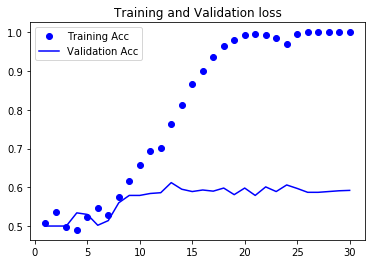

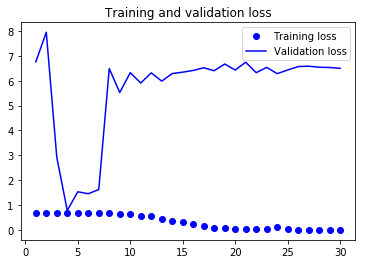

In [53]:
#Displaying the curves of loss and accuracy during training

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation loss')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
"""

The graph of the model above shows that its a highly overfitting model.

"""